In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import platform
from matplotlib import font_manager, rc

%matplotlib inline

# matplotlib를 통해 차트를 생성할 때 한글이 제대로 표시되지 않기 떄문에 OS에 따라 font 변경
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

In [2]:
# train.csv 데이터 로드
train = pd.read_csv("./data/data.csv", index_col=["닉네임"])

# 업데이트 되지 않은 컨텐츠 제거
train.drop("서브스테이지플레이", axis=1, inplace=True)
train.drop("레이드플레이", axis=1, inplace=True)
train.drop("수색", axis=1, inplace=True)
train.drop("아이템제작", axis=1, inplace=True)

print(train.shape)
train.head()

(2000, 15)


,연구/훈련,계정레벨,로그인,무기강화,소탕,스테이지플레이,뽑기,노점상구매,전투템구매,이벤트상품구매,재화구매,스태미나전송,캐릭터제작,가속,결제여부
닉네임,,,,,,,,,,,,,,,
청월영,5,4,12,1,107,35,53,11,0,0,6,0,0,0,0
간장공장,5,3,11,2,44,75,21,11,0,0,1,0,1,5,0
에돌이,9,5,3,2,76,55,40,6,0,3,0,0,0,0,0
샤킁,7,11,8,18,47,66,5,6,3,1,0,3,3,0,0
지푸라기,10,3,11,7,83,36,47,9,5,0,0,5,0,5,0


## 데이터셋 분리
* 학습용 데이터셋
* 검증용 데이터셋
* 검증 정답지

In [3]:
# 끝의 500개의 데이터를 테스트 데이터셋으로 사용
test = train[1500:]

# 학습용 데이터셋에서 테스트로 사용할 500개 제외
train.drop(train.index[1500:], inplace=True)

# 테스트 정답지
y_test = test["결제여부"]

# 테스트 데이터셋에서 정답 제거
test.drop("결제여부", axis=1, inplace=True)
print(test.shape)
test.head()

(500, 14)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,연구/훈련,계정레벨,로그인,무기강화,소탕,스테이지플레이,뽑기,노점상구매,전투템구매,이벤트상품구매,재화구매,스태미나전송,캐릭터제작,가속
닉네임,,,,,,,,,,,,,,
청월영,7,13,11,1,106,49,26,7,0,0,3,0,2,0
지푸라기,10,4,6,1,52,66,43,9,8,4,1,8,1,4
루미,41,3,22,0,26,68,15,0,1,2,0,1,2,0
DREAM,8,2,12,10,67,34,29,4,0,0,14,0,0,5
먼저간다,17,4,11,7,59,37,33,13,24,0,4,24,1,0


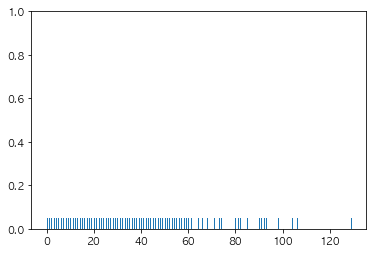

In [4]:
data=train[["뽑기"]]
sns.rugplot(data)

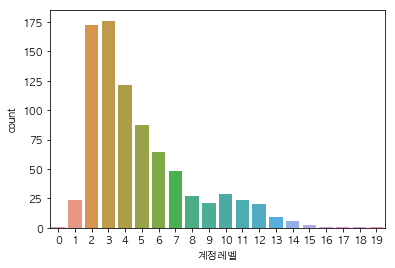

In [5]:
sns.countplot(x="계정레벨", data=train)

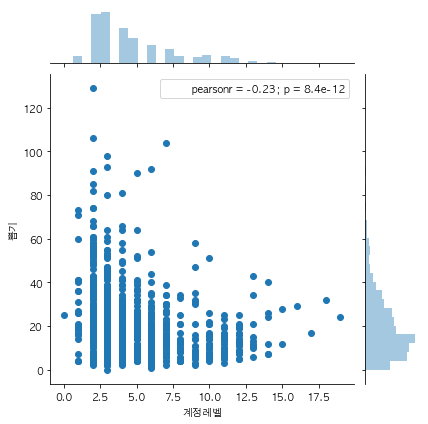

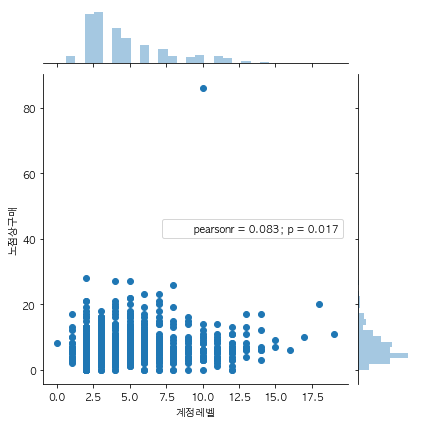

In [6]:
# 레벨에 따른 뽑기 횟수
sns.jointplot(x="계정레벨", y="뽑기", data=train)

# 레벨에 따른 노점상구매 횟수
sns.jointplot(x="계정레벨", y="노점상구매", data=train)

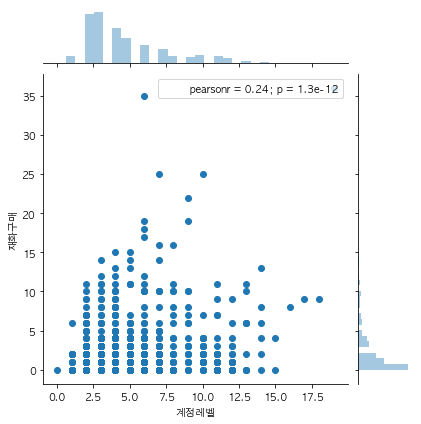

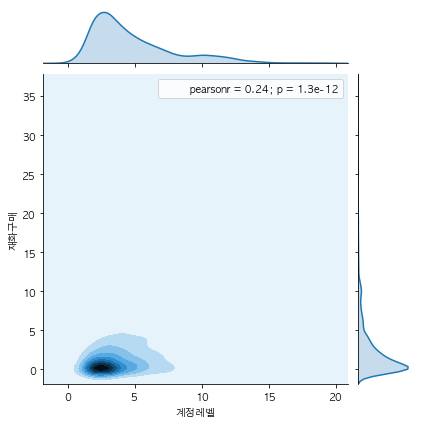

In [7]:
# 레벨에 따른 노점상구매 횟수
sns.jointplot(x="계정레벨", y="재화구매", data=train)
sns.jointplot(x="계정레벨", y="재화구매", data=train, kind="kde")

In [8]:
# 상관관계 (Correlation) 분석 
# 1 :  상관 (양의 상관관계)
# 0 :  무상관
# -1 : 반상관 (음의 상관관계)

corr = train.corr()
corr = corr.applymap(lambda x: round(x,3))

corr

,연구/훈련,계정레벨,로그인,무기강화,소탕,스테이지플레이,뽑기,노점상구매,전투템구매,이벤트상품구매,재화구매,스태미나전송,캐릭터제작,가속,결제여부
연구/훈련,1.000,0.004,0.169,-0.020,-0.028,-0.024,0.127,0.102,-0.024,0.023,0.172,-0.024,0.025,0.122,0.077
계정레벨,0.004,1.000,-0.152,0.211,0.116,0.226,-0.233,0.083,0.135,0.167,0.242,0.135,0.337,-0.276,0.069
로그인,0.169,-0.152,1.000,-0.102,-0.034,0.015,0.089,0.007,-0.123,-0.076,-0.028,-0.123,-0.068,0.089,-0.088
무기강화,-0.020,0.211,-0.102,1.000,0.002,0.054,-0.216,0.141,0.215,0.144,0.226,0.215,-0.007,-0.101,0.075
소탕,-0.028,0.116,-0.034,0.002,1.000,-0.218,0.212,0.218,-0.013,0.105,0.246,-0.013,0.097,0.180,0.134
스테이지플레이,-0.024,0.226,0.015,0.054,-0.218,1.000,-0.023,-0.070,0.158,0.046,0.237,0.158,0.004,-0.103,0.096
뽑기,0.127,-0.233,0.089,-0.216,0.212,-0.023,1.000,0.152,-0.069,-0.007,0.116,-0.069,0.004,0.260,0.096
노점상구매,0.102,0.083,0.007,0.141,0.218,-0.070,0.152,1.000,0.037,0.133,0.285,0.037,0.013,0.053,0.171
전투템구매,-0.024,0.135,-0.123,0.215,-0.013,0.158,-0.069,0.037,1.000,-0.051,0.160,1.000,-0.039,-0.134,0.122
이벤트상품구매,0.023,0.167,-0.076,0.144,0.105,0.046,-0.007,0.133,-0.051,1.000,0.114,-0.051,0.306,0.044,0.165


Text(0.5,1,'Heatmap of Correlation Matrix')

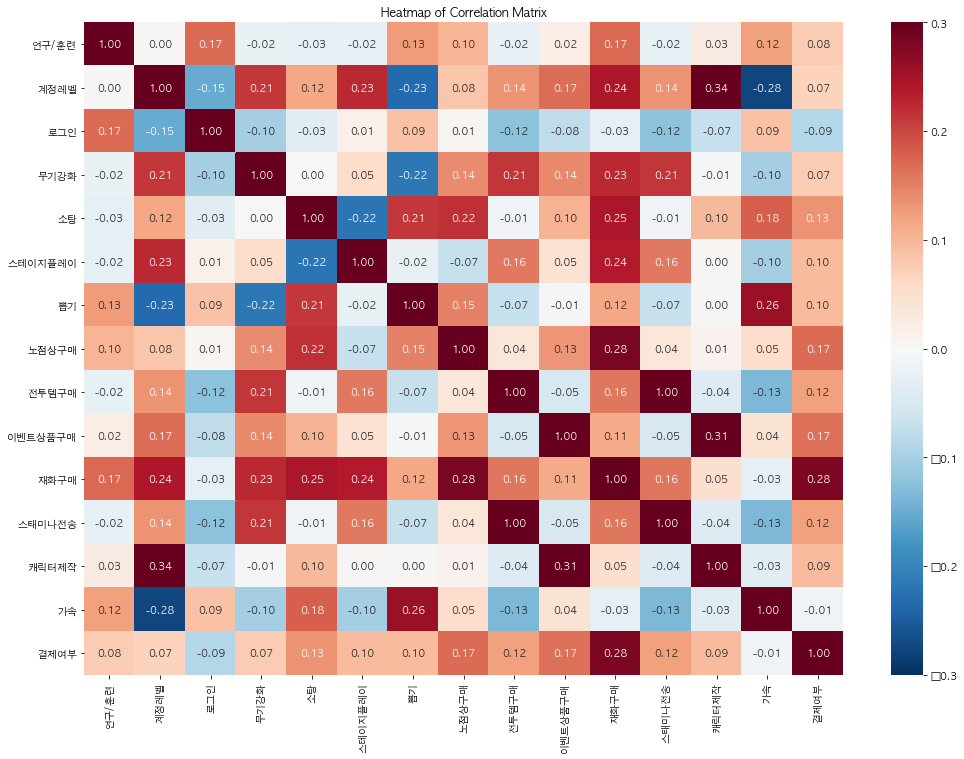

In [9]:
plt.figure(figsize=(17,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', vmax=.3, vmin=-.3)
plt.title('Heatmap of Correlation Matrix')

## Feature 선택
* 상점에 대한 피처들이 결제여부에 중요한 요소

In [10]:
feature_names = ["재화구매", "이벤트상품구매", "노점상구매", "전투템구매"]

In [11]:
# 학습 데이터 추출
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(835, 4)


,재화구매,이벤트상품구매,노점상구매,전투템구매
닉네임,,,,
간장공장,1,0,11,0
에돌이,0,3,6,0
샤킁,0,1,6,3
레스타트,1,0,8,17
보송보송해,0,0,18,0


In [12]:
# 학습 데이터 정답
y_train = train["결제여부"]
y_train.head()

닉네임
간장공장     0
에돌이      0
샤킁       0
레스타트     0
보송보송해    0
Name: 결제여부, dtype: int64

In [13]:
# 검증 데이터 추출
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(500, 4)


,재화구매,이벤트상품구매,노점상구매,전투템구매
닉네임,,,,
청월영,3,0,7,0
지푸라기,1,4,9,8
루미,0,2,0,1
DREAM,14,0,4,0
먼저간다,4,0,13,24


In [14]:
# 학습 데이터 정답 (상위에서 미리 설정해둠)
y_train.head()

닉네임
간장공장     0
에돌이      0
샤킁       0
레스타트     0
보송보송해    0
Name: 결제여부, dtype: int64

In [15]:
# SkLearn (머신러닝 패키지)
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

from time import time
from sklearn import metrics
from optparse import OptionParser

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# Decision Tree 알고리즘으로 학습을 시작한다.
tree = DecisionTreeClassifier(random_state=37, max_depth=5)
tree.fit(X_train, y_train)

print("Train set accuracy = ", tree.score(X_train, y_train))
print("Test set accuracy = ", tree.score(X_test, y_test))

Train set accuracy =  0.877844311377
Test set accuracy =  0.808


In [17]:
# Random Forest 알고리즘으로 학습을 시작한다.
randomforest = RandomForestClassifier(n_estimators=1000, max_depth=None, 
                                      min_samples_split=2, 
                                      random_state=10)
randomforest.fit(X_train, y_train)

print("Train set accuracy = ", randomforest.score(X_train, y_train))
print("Test set accuracy = ", randomforest.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(randomforest, train, test, cv=10).mean())
print(metrics.classification_report(y_test, tree.predict(X_test)))
print("Random Forest:\n", metrics.confusion_matrix(y_test, tree.predict(X_test)))

Train set accuracy =  0.985628742515
Test set accuracy =  0.808
             precision    recall  f1-score   support

          0       0.81      0.99      0.89       406
          1       0.25      0.01      0.02        94

avg / total       0.71      0.81      0.73       500

Random Forest:
 [[403   3]
 [ 93   1]]


In [18]:
# Gradient Boostring Decision Tree 알고리즘으로 학습을 시작한다.
gbdt = GradientBoostingClassifier(n_estimators=1000, 
                                  max_depth=4,
                                  min_weight_fraction_leaf=0.1,
                                  random_state = 10)
gbdt.fit(X_train, y_train)

print("Train set accuracy = ", gbdt.score(X_train, y_train))
print("Test set accuracy = ", gbdt.score(X_test, y_test))

Train set accuracy =  0.900598802395
Test set accuracy =  0.804


In [19]:
# Logistic Regression 알고리즘으로 학습을 시작한다.
logistic = LogisticRegression(random_state=10)
logistic.fit(X_train, y_train)

print("Train set accuracy = ", logistic.score(X_train, y_train))
print("Test set accuracy = ", logistic.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(logistic, X, y, cv=10).mean())

Train set accuracy =  0.864670658683
Test set accuracy =  0.812


In [20]:
# Support Vector Machine 알고리즘으로 학습을 시작한다.
svc = SVC(random_state=10)
svc.fit(X_train, y_train)

print("Train set accuracy = ", svc.score(X_train, y_train))
print("Test set accuracy = ", svc.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(svc, X, y, cv=10).mean())

Train set accuracy =  0.920958083832
Test set accuracy =  0.814


In [21]:
# K-Nearest Neighbers 알고리즘으로 학습을 시작한다.
knn = KNeighborsClassifier(weights='distance', n_neighbors=5)
knn.fit(X_train, y_train)

print("Train set accuracy = ", knn.score(X_train, y_train))
print("Test set accuracy = ", knn.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(knn, X, y, cv=10).mean())

Train set accuracy =  0.985628742515
Test set accuracy =  0.808


In [22]:
# Multinomia Naive Bayes 알고리즘으로 학습을 시작한다.
nb = MultinomialNB(alpha=.1)
nb.fit(X_train, y_train)

print("Train set accuracy = ", nb.score(X_train, y_train))
print("Test set accuracy = ", nb.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(nb, X, y, cv=10).mean())

Train set accuracy =  0.822754491018
Test set accuracy =  0.792


In [23]:
# Multi-Layer Perceptron 알고리즘으로 학습을 시작한다.
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 4), random_state=10, max_iter=1000)
mlp.fit(X_train, y_train)

print("Train set accuracy = ", mlp.score(X_train, y_train))
print("Test set accuracy = ", mlp.score(X_test, y_test))
#print("CV 10fold = ", cross_val_score(mlp, X, y, cv=10).mean())

Train set accuracy =  0.853892215569
Test set accuracy =  0.812


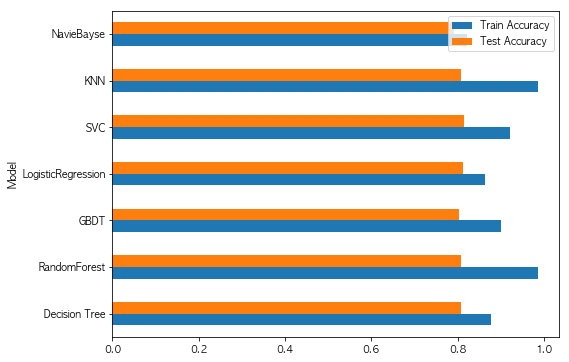

In [24]:
# 각각의 모델을 비교해본다.
models = [tree, randomforest, gbdt, logistic, svc, knn, nb]
modelNames = ['Decision Tree', 'RandomForest', 'GBDT', 'LogisticRegression', 'SVC', 'KNN', 'NavieBayse']

scores = [(name, clf.score(X_train, y_train), clf.score(X_test, y_test)) for name, clf in zip(modelNames, models)]
score_ds = pd.DataFrame(scores, columns=['Model', 'Train Accuracy', 'Test Accuracy'])

score_ds.plot(kind='barh', x='Model', figsize=(8,6))

In [25]:
# 모델별로 정확도를 비교해본다. 

# 최고점 모델을 확인한다.
print("tree Test set accuracy = ", tree.score(X_test, y_test))
print("randomforest Test set accuracy = ", randomforest.score(X_test, y_test))
print("gbdt Test set accuracy = ", gbdt.score(X_test, y_test))
print("logistic Test set accuracy = ", logistic.score(X_test, y_test))
print("svn Test set accuracy = ", svc.score(X_test, y_test))
print("knn Test set accuracy = ", knn.score(X_test, y_test))
print("nb Test set accuracy = ", nb.score(X_test, y_test))
# print("Test set accuracy = ", mlp.score(X_test, y_test))


tree Test set accuracy =  0.808
randomforest Test set accuracy =  0.808
gbdt Test set accuracy =  0.804
logistic Test set accuracy =  0.812
svn Test set accuracy =  0.814
knn Test set accuracy =  0.808
nb Test set accuracy =  0.792
